<a href="https://colab.research.google.com/github/leftbackn3/deskew_opencv/blob/main/img_skew_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code Reference-pyimagesearch tutorial

Importing requisite library packages

In [ ]:
import numpy as np
import cv2


Reading image files from folder

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/invoice_images/real_img1.jpg")


Segregating text from images

Initially making sure that the background is dark

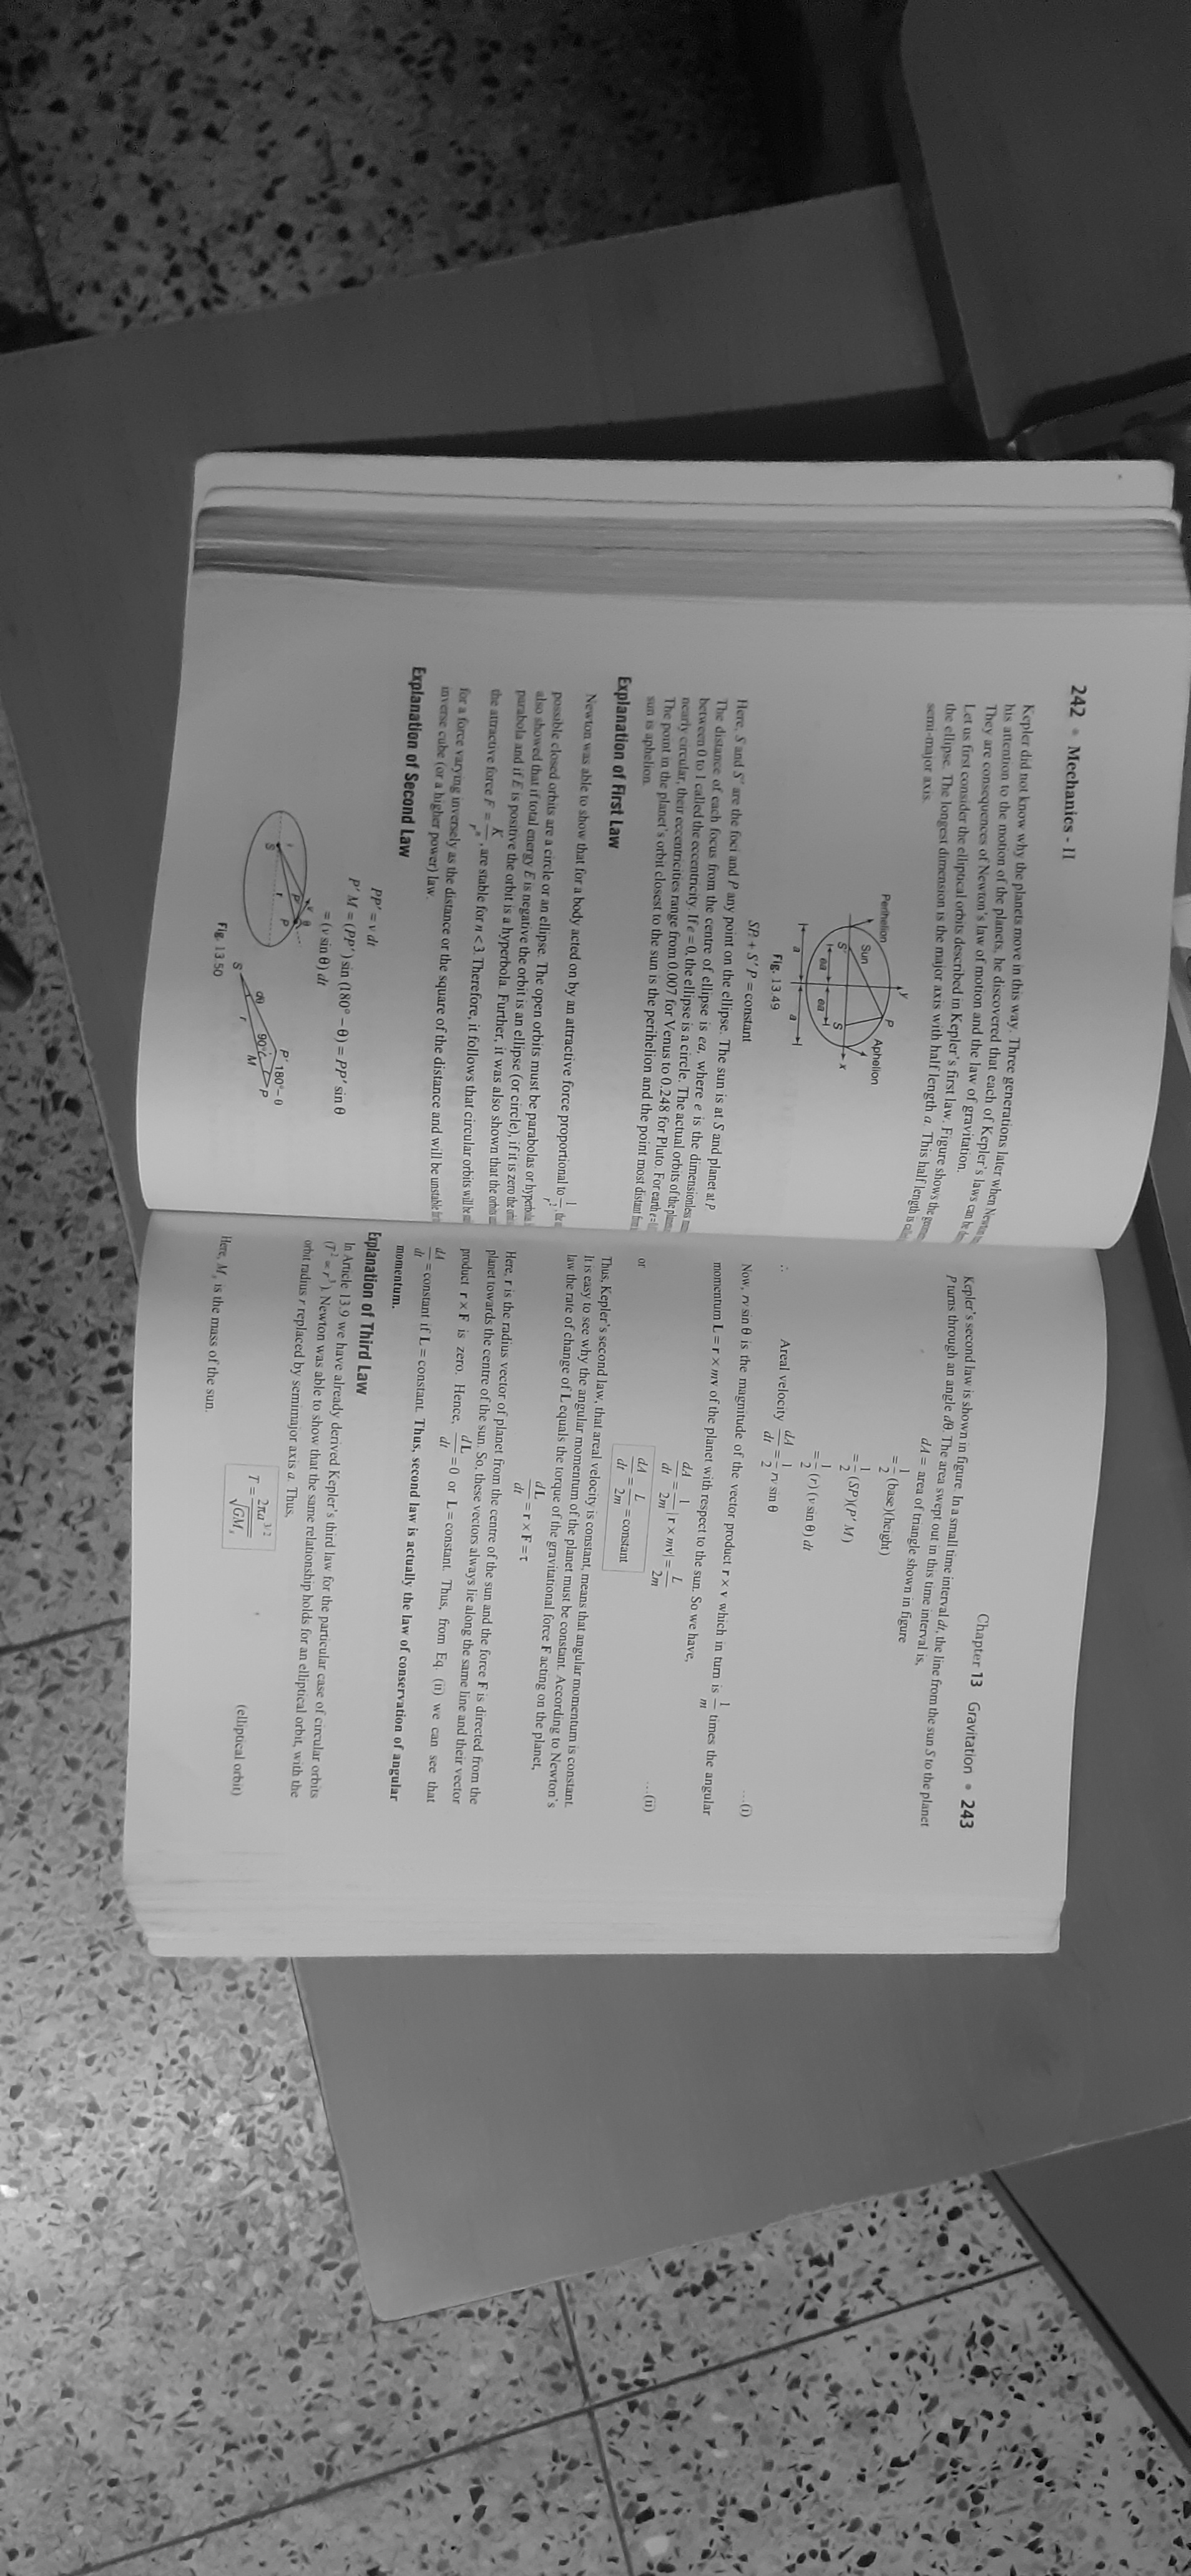

In [ ]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [ ]:
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
	angle = -(90 + angle)
else:
	angle = -angle

In [ ]:
skewed_angle=angle
print(skewed_angle)

-0.0


# New Section

Rotating image for deskewing it

In [ ]:
(h, w) = img1.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img1, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

[INFO] angle: -2.042


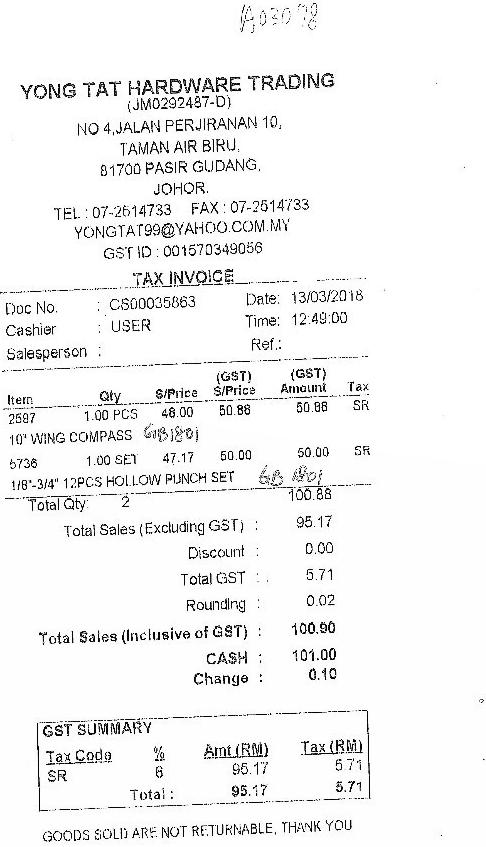

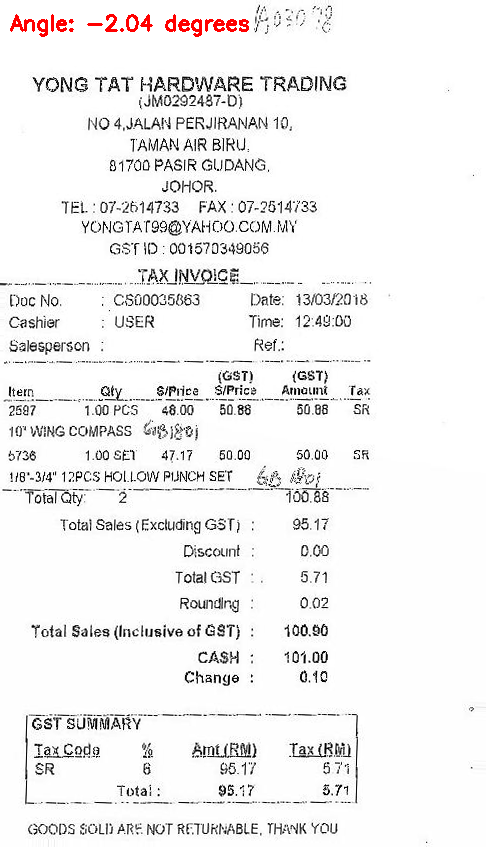

-1

In [ ]:
from google.colab.patches import cv2_imshow
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
print("[INFO] angle: {:.3f}".format(angle))
cv2_imshow(img1)

cv2_imshow(rotated)
cv2.waitKey(0)
